In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler

In [18]:
train = pd.read_csv('downloads/train.csv')
test = pd.read_csv('downloads/test.csv')

In [19]:
train['Embarked'] = train.Embarked.fillna('S')
train['Sex'] = LabelEncoder().fit_transform(train['Sex'])
train['Embarked'] = LabelEncoder().fit_transform(train['Embarked'])
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])
test['Embarked'] = LabelEncoder().fit_transform(test['Embarked'])

In [51]:
train['Age'] = train.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
test['Age'] = test.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


In [75]:
lst = []
for col in train.drop(['Name','Ticket','Cabin'],axis=1).columns:
    lst.append([abs(train.Survived.corr(train[col])),col])
    #print([col,train.Survived.corr(train[col])])
lst.sort(reverse=True)
lst

[[1.0, 'Survived'],
 [0.5433513806577552, 'Sex'],
 [0.5424928737857646, 'psex'],
 [0.33848103596101536, 'Pclass'],
 [0.33180491185789374, 'Fare'],
 [0.2033670856998919, 'IsAlone'],
 [0.16767531386772133, 'Embarked'],
 [0.08162940708348349, 'Parch'],
 [0.06243325091426857, 'title'],
 [0.03638364552959677, 'Age'],
 [0.0353224988857356, 'SibSp'],
 [0.01663898928274522, 'Family'],
 [0.0050066607670664915, 'PassengerId']]

In [52]:
train['title'] = train['Name'].str.extract('([A-za-z]+)\.')
train['title'] = train['title'].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['title'] = train['title'].replace(['Lady','Mme','Mlle', 'Countess'],'Mrs')

test['title'] = test['Name'].str.extract('([A-za-z]+)\.')
test['title'] = test['title'].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['title'] = test['title'].replace(['Lady','Mme','Mlle', 'Countess'],'Mrs')

In [53]:
train['title'] = LabelEncoder().fit_transform(train['title'])
test['title'] = LabelEncoder().fit_transform(test['title'])

In [54]:
train['Family'] = train['SibSp'] +train['Parch']+1
train['IsAlone'] = 0
train.loc[train['Family'] ==1,'IsAlone'] = 1

test['Family'] = test['SibSp'] +test['Parch']+1
test['IsAlone'] = 0
test.loc[test['Family'] ==1,'IsAlone'] = 1

In [33]:
train['psex'] = train['Pclass'] * train['Sex']

In [169]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Family,IsAlone,psex,Famname
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,0.683603,47,2,2,2,0,3,73
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,1.450832,81,0,3,2,0,0,142
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,0.727559,47,2,1,1,1,0,258
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,1.379314,55,2,3,2,0,0,204
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,0.735091,47,2,2,1,1,3,11


In [95]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [103]:
train['Famname'] = train['Name'].str.extract('([A-Za-z]+),')
len(train.Famname.unique())
train['Famname'] = LabelEncoder().fit_transform(train['Famname'])

test['Famname'] = test['Name'].str.extract('([A-Za-z]+),')
test['Famname'] = LabelEncoder().fit_transform(test['Famname'])



In [122]:
train.Cabin.corr(train.Survived)

0.17569045103556682

In [117]:
tmp = pd.read_csv('downloads/train.csv')
train['Cabin'] = tmp['Cabin']
train['Cabin'] = train.groupby(['Pclass','Family'])['Cabin'].apply(lambda x: x.fillna(train.Cabin.mode()[0]))

In [150]:
#train["Fare"] = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
#test["Fare"] = test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
#train.Cabin = LabelEncoder().fit_transform(train.Cabin)

In [132]:
#train[['Pclass','Sex','Fare','Embarked','IsAlone','Age','Parch','title']] = MinMaxScaler().fit_transform(train[['Pclass','Sex','Fare','Embarked','IsAlone','Age','Parch','title']])
X = train[['Pclass','Sex','Fare','Embarked','IsAlone','Cabin','Age','title','Famname']]
y = train['Survived']
xt = test[['Pclass','Sex','Fare','Embarked','IsAlone','Age','Parch','title']]

In [29]:
train.loc[train['Age'] <= 16,'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32),'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48),'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64),'Age'] = 3
train.loc[train['Age'] >= 64,'Age'] = 4

In [56]:
test.loc[test['Age'] <= 16,'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32),'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48),'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64),'Age'] = 3
test.loc[test['Age'] >= 64,'Age'] = 4

In [151]:
xtrain,xtest,ytrain,ytest = train_test_split(pd.get_dummies(X),y, random_state = 0)

In [64]:
#test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int32
title          418 non-null int32
Family         418 non-null int64
IsAlone        418 non-null int64
dtypes: float64(2), int32(3), int64(6), object(3)
memory usage: 40.9+ KB


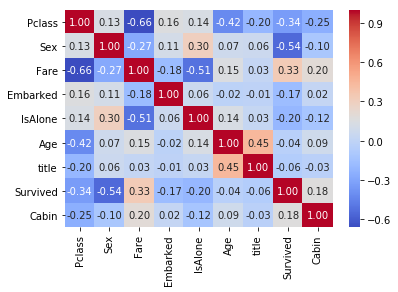

In [152]:
g = sns.heatmap(train[['Pclass','Sex','Fare','Embarked','IsAlone','Age','title','Survived','Cabin']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [168]:

#svm = SVC(kernel = 'rbf', C=10, gamma=1).fit(xtrain, ytrain)
#pred = svm.predict(xtest)
#acc = svm.score(xtest,ytest) #0.8251

#lr = LogisticRegression(C=6).fit(xtrain,ytrain)
#pred = lr.predict(xtest)
#acc = lr.score(xtest,ytest) #0.7802

#knn = KNeighborsClassifier(n_neighbors = 6).fit(xtrain,ytrain)
#pred = knn.predict(xtest)
#acc = knn.score(xtest,ytest) # 0.8116

#dt = DecisionTreeClassifier(max_depth=4).fit(xtrain, ytrain)
#pred = dt.predict(xtest)
#acc = dt.score(xtest,ytest) # 0.8116

#clf = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
#pred = clf.predict(xtest)
#acc = clf.score(xtest,ytest) # 0.8206

#nbclf = GaussianNB().fit(xtrain, ytrain)
#pred = nbclf.predict(xtest)
#acc = nbclf.score(xtest,ytest) # 0.74887

clf = RandomForestClassifier(n_estimators =1000,random_state=0,max_features=7,max_depth=6).fit(xtrain, ytrain)
pred = clf.predict(xtest)
#acc = clf.score(xtest,ytest) #0.83856

#clf = GradientBoostingClassifier(learning_rate = 1, max_depth = 4, random_state = 0).fit(xtrain,ytrain)
#pred = clf.predict(xtest)
#acc = clf.score(xtest,ytest) #0.83856

#nnclf= MLPClassifier(solver='lbfgs',activation='tanh',alpha = 0.001,random_state=0).fit(xtrain,ytrain)
#pred = nnclf.predict(xtest)
#acc = nnclf.score(xtest,ytest) #0.83408

#clf = RandomForestClassifier(n_estimators =1000,random_state=0,max_features=7,max_depth=6).fit(X, y)
#pred = clf.predict(xt)

f1_score(ytest,pred)
#output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': pred})
#output.to_csv('my_submission.csv', index=False)

0.7901234567901233

In [197]:
tmp['Tick'] = tmp['Ticket'].str.extract('([^0-9]+)')
tmp.Tick = tmp.Tick.fillna('X')
tmp.Tick = LabelEncoder().fit_transform(tmp.Tick)
tmp['test'] = tmp.Tick/tmp.Pclass
tmp.Survived.corr(tmp.test)

0.26050281916730206